1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Predicted: [('n03450230', 'gown', 0.19088568), ('n03534580', 'hoopskirt', 0.07605634), ('n03424325', 'gasmask', 0.054620285)]


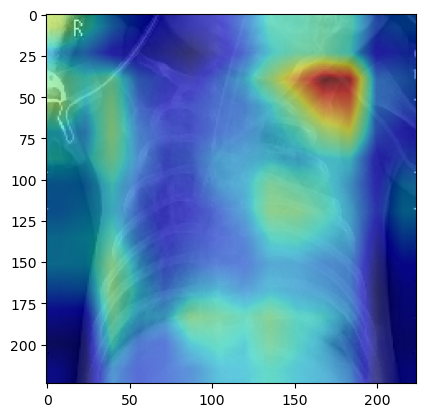

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
import cv2


def get_grad_cam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    output = conv_output[0]
    grads = tape.gradient(loss, conv_output)[0]

    guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    cam = np.dot(output, weights)

    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())

    return heatmap

def get_grad_cam(model, img_array, layer_name):
    grad_model = tf.keras.models.Model(model.inputs, [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_output, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    output = conv_output[0]
    
    # Convert img_array to a TensorFlow tensor
    img_tensor = tf.convert_to_tensor(img_array)

    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        conv_output, predictions = grad_model(img_tensor)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_output)[0]
    guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

    weights = tf.reduce_mean(guided_grads, axis=(0, 1))

    cam = np.dot(output, weights)

    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = (cam - cam.min()) / (cam.max() - cam.min())

    return heatmap

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet')

# Choose an image from your dataset
img_path = '../data/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Get the predictions for the image
preds = model.predict(x)
decoded_preds = decode_predictions(preds, top=3)[0]
print('Predicted:', decoded_preds)

# Choose the layer name from which you want to compute Grad-CAM
layer_name = 'block5_conv3'

# Get Grad-CAM heatmap
heatmap = get_grad_cam(model, x, layer_name)

# Overlay heatmap on the original image
plt.imshow(img)
plt.imshow(heatmap, alpha=0.5, cmap='jet')
plt.show()


In [12]:
preds

array([[7.91034290e-06, 9.55677388e-06, 7.22084602e-04, 1.07677141e-03,
        1.43454608e-03, 1.23119651e-04, 4.20755823e-04, 1.96086603e-06,
        7.08614380e-07, 3.08635499e-08, 2.82226154e-07, 5.86450426e-07,
        7.42696557e-07, 8.97838788e-07, 1.26307484e-07, 4.39275482e-07,
        1.04449930e-06, 1.46313357e-06, 4.67851692e-07, 9.51260063e-06,
        1.11627443e-07, 1.14220416e-06, 2.01978287e-06, 7.11806160e-06,
        9.45988177e-07, 8.87226292e-07, 1.07567257e-06, 2.42244050e-06,
        7.19814989e-06, 1.29791966e-04, 1.59010838e-07, 1.71601562e-06,
        1.96530664e-06, 6.99648881e-05, 1.10006455e-04, 5.57982901e-07,
        4.85606415e-06, 1.45604281e-06, 1.78693117e-05, 2.87162402e-06,
        3.86303964e-06, 8.28775683e-07, 1.13281726e-06, 9.54341886e-07,
        3.48631238e-06, 4.19525759e-06, 2.05696551e-06, 3.43272205e-07,
        4.19613542e-07, 1.24718918e-06, 9.66057814e-06, 1.18989874e-05,
        1.73769076e-05, 1.04830488e-05, 1.34027168e-05, 6.330732

In [5]:
import os 
os.getcwd()

'd:\\sem5\\MLinHealthCare\\ML4H_git\\Project1\\code'